# Prevent Data quality Problems 
- the detection and correction of problems 
- algorithms 


# Measurement and Data Collection Errors 

- Measurement error (측정자체의 오류) = Outlier 
  - Noise 
  - Artifact (기계가 망가진 경우) 

- Data collection error (수집 중 오류 - 데이터를 빼먹거나, 속성 값 하나 뺀 경우 등) = Outlier, Missing Values, Inconsistent Values, Duplicate Data 

[이상치, 결측치, 일관성 없는 값(음수인 키), 중복데이터] 

# Data Preprocessing 

## 01. Aggregation (집계연산)
- 2개 이상의 objects를 한 개로 합침 

- 왜 사용? 
  - less memory 
  - high-level view (각 상점 -> 각 지역)
  - more stable (시간 별 온도 -> 하루 온도(평균)) 

- 단점 
  - 원본데이터만큼의 정보가 날라간다

In [1]:
department = [10,10,20,20,20,20,30,30,40,50,50,70,70,70,70,70]
salary = [100,200,300,40,1000,200,340,500,60,700,100,2000,300,400,5000,100]
import pandas as pd
df = pd.DataFrame({
    "de" : department, 
    "sal" : salary
})
df

,de,sal
0,10,100
1,10,200
2,20,300
3,20,40
4,20,1000
5,20,200
6,30,340
7,30,500
8,40,60
9,50,700


In [5]:
df2 = df.groupby('de').sum()
df2.reset_index(inplace = True)
df2

,de,sal
0,10,300
1,20,1540
2,30,840
3,40,60
4,50,800
5,70,7800


## 02. Sampling 

- 왜 사용? 
  - 통계학자 : 전체 데이터 수집 too expensive 
  - 데이터 : 전체 데이터 전처리 too expensive 

- Key principle 
  - Use a representative sample 

### 2-1) simple random sampling 

In [6]:
# simple random sampling 

## 복원 추출 
import numpy as np 

### 1) 시드설정 
np.random.seed(0)

### 2) 난수생성 
np.random.rand(16)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 ])

In [7]:
### 3) 데이터 순서 바꾸기 
x = np.arange(10)
x 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.random.shuffle(x) # inplace = True와 같음 
x

array([4, 1, 6, 7, 2, 8, 5, 9, 0, 3])

In [9]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
np.random.permutation(x) # return만 

array([5, 2, 7, 4, 1, 0, 6, 8, 9, 3])

`np.random.choice(a, size = , replace =, p = )`

- a : 배열이면 배열 자체, 정수면 arange(a)명령으로 배열 생성 
- size : 정수, 샘플 숫자 
- replace : True면 복원 추출, False 비복원추출 
- p : 배열, 각 데이터가 선택될 수 있는 확률 




In [11]:
### 4) 데이터 샘플링 
np.random.choice(5,5, replace = True)

array([0, 2, 4, 3, 3])

In [12]:
x = np.arange(10)
np.random.choice(x,5)

array([2, 7, 2, 0, 0])

In [14]:
np.random.choice(x,5, replace = False)

array([2, 3, 7, 1, 9])

In [15]:
### 5) 난수 생성 

np.random.rand(5) # 0~1사이의 균일분포 

array([0.44994999, 0.61306346, 0.90234858, 0.09928035, 0.96980907])

In [16]:
np.random.rand(5,5)

array([[0.65314004, 0.17090959, 0.35815217, 0.75068614, 0.60783067],
       [0.32504723, 0.03842543, 0.63427406, 0.95894927, 0.65279032],
       [0.63505887, 0.99529957, 0.58185033, 0.41436859, 0.4746975 ],
       [0.6235101 , 0.33800761, 0.67475232, 0.31720174, 0.77834548],
       [0.94957105, 0.66252687, 0.01357164, 0.6228461 , 0.67365963]])

In [17]:
np.random.randn(10) # 가우시안 표준 정규분포 

array([-0.68658948,  0.01487332, -0.3756659 , -0.03822364,  0.36797447,
       -0.0447237 , -0.30237513, -2.2244036 ,  0.72400636,  0.35900276])

In [18]:
np.random.randn(2,3)

array([[1.07612104, 0.19214083, 0.85292596],
       [0.01835718, 0.42830357, 0.99627783]])

In [20]:
np.random.randint(10, size = 5) # low , high = None, size = None 
# 0부터 10 사이의 정수 출력 

array([8, 8, 8, 2, 3])

In [21]:
np.random.randint(10,30,size=(3,5))

array([[12, 21, 23, 26, 18],
       [18, 29, 18, 12, 13],
       [22, 24, 10, 14, 13]])

In [25]:
 # 샘플링 해보기 
 sample_index = np.random.choice(df.index,size=5,replace=True)
 sample_index

array([ 6, 13,  9, 13, 11])

In [40]:
df_sample = pd.DataFrame(columns = ["de", "sal", "랜덤"])
for i in sample_index : 
  df_sample = df_sample.append(df.loc[i]) # df.loc[i] : 전체 데이터프레임에서 인덱스 이름이 i인 행만 추출해줘 
  # df.iloc[i] : 전체 데이터프레임에서 i번째 행에 있는 값들만 추출해줘 

df_sample

,de,sal,랜덤
6,30.0,340.0,0.315498
13,70.0,400.0,0.237143
9,50.0,700.0,0.390117
13,70.0,400.0,0.237143
11,70.0,2000.0,0.444931


### 2-2) Stratified sampling (층화 추출)
 - select objects from each group
  - 같은 크기로 뽑음 
  - 그룹의 크기에 비례해서 뽑을 수도 있음

  [stratify](https://towardsdatascience.com/stratified-random-sampling-using-python-and-pandas-1c84f0362ebc)
  

In [41]:
df

,de,sal,랜덤
0,10,100,0.517878
1,10,200,0.960086
2,20,300,0.886876
3,20,40,0.362184
4,20,1000,0.644523
5,20,200,0.225139
6,30,340,0.315498
7,30,500,0.417479
8,40,60,0.131773
9,50,700,0.390117


In [45]:
# preparing to stratify 

(df['de'].value_counts() / len(df)).sort_values()

40    0.0625
30    0.1250
10    0.1250
50    0.1250
20    0.2500
70    0.3125
Name: de, dtype: float64

In [44]:
df['de'].unique()

array([10, 20, 30, 40, 50, 70])

In [47]:
def stratify_data(df_data, stratify_column_name, stratify_values, stratify_proportions, random_state=None):
  
    df_stratified = pd.DataFrame(columns = df_data.columns) # Create an empty DataFrame with column names matching df_data

    pos = -1
    for i in range(len(stratify_values)): # iterate over the stratify values (e.g. "Male, Undergraduate" etc.)
        pos += 1
        if pos == len(stratify_values) - 1: 
            ratio_len = len(df_data) - len(df_stratified) # if this is the final iteration make sure we calculate the number of values for the last set such that the return data has the same number of rows as the source data
        else:
            ratio_len = int(len(df_data) * stratify_proportions[i]) # Calculate the number of rows to match the desired proportion

        df_filtered = df_data[df_data[stratify_column_name] ==stratify_values[i]] # Filter the source data based on the currently selected stratify value
        df_temp = df_filtered.sample(replace=True, n=ratio_len, random_state=random_state) # Sample the filtered data using the calculated ratio
        
        df_stratified = pd.concat([df_stratified, df_temp]) # Add the sampled / stratified datasets together to produce the final result
        
    return df_stratified # Return the stratified, re-sampled data   

In [49]:
stratify_values = [10, 20, 30, 40, 50, 70]
stratify_proportions = [0.125,0.25,0.125,0.125,0.3125]

df_stratified = stratify_data(df, 'de', stratify_values, stratify_proportions, random_state=42)
df_stratified

,de,sal,랜덤
0,10,100,0.517878
1,10,200,0.960086
4,20,1000,0.644523
5,20,200,0.225139
2,20,300,0.886876
4,20,1000,0.644523
6,30,340,0.315498
7,30,500,0.417479
8,40,60,0.131773
8,40,60,0.131773


In [50]:
df.drop('랜덤', axis = 1, inplace = True)

In [52]:
# sklearn.model_selection 사용 
!pip install sklearn
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=6, test_size=None, train_size=None, random_state=None)
split.get_n_splits(df)

6

....음 여기부터는 언젠가 다시 하길 

### 2-3) Progressive sampling 
- 셈플을 작게 잡아서 모델 돌리고 
- 점점 샘플 크게 허용 
- 성능이 더이상 안늘어날 때까지 

## 03. Dimensionality Reduction

- 주요 장점 
    - 차원의 저주 X 
    - 모델이 간단해짐 
    - 원본데이터의 특성은 유지하면서 양이 적어짐 → 알고리즘이 빨리 돌아감 
    - 시각화하기 더 쉬워짐 

- 차원이 많으면? 
    - 공간이 폭발적으로 증가 
    - 공간에 데이터가 없는 경우가 발생 
    

### PCA

In [2]:
# 데이터 불러오기 
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# 표준화하기 
from sklearn.preprocessing import StandardScaler #  표준화 패키지 라이브러리 

x = df.drop(['target'], axis = 1).values # 독립변수들의 value만 추출 
y = df['target'].values # 종속변수 추출 

In [8]:
x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장 
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
pd.DataFrame(x, columns = features).head() # 확인 

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [18]:
# PCA 실행 

from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 주성분 개수 설정 
principalComponents = pca.fit_transform(x) # 주성분 추출 
df_principal = pd.DataFrame(data = principalComponents, columns = ["pca1", "pca2"]) # 주성분으로 이루어진 데이터프레임 
df_principal.head()

,pca1,pca2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [11]:
# 설정한 주성분의 개수로 전체 데이터의 분산을 얼마만큼 설명 가능한가?? 
pca.explained_variance_ratio_  # sklearn에서 언더바는 분석이 진행된 이후의 결과값을 나타냄 
# 첫 번재 주성분은  0.72 설명, 두 번째는 0.23 설명 

array([0.72770452, 0.23030523])

In [12]:
sum(pca.explained_variance_ratio_) # 두 개의 주성분은 전체 분산의 약 96% 설명 

0.9580097536148199

In [15]:
# n = 3인 경우 

pca = PCA(n_components= 3)
principalComponents = pca.fit_transform(x)
df_principal = pd.DataFrame(data = principalComponents, columns = ["p1","p2","p3"])
df_principal.head()

,p1,p2,p3
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428


In [16]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

In [17]:
sum(pca.explained_variance_ratio_) # 3번째 분산 설명량이 매우 적다 따라서, 2개로 하는 것이 맞음 

0.9948480731910938

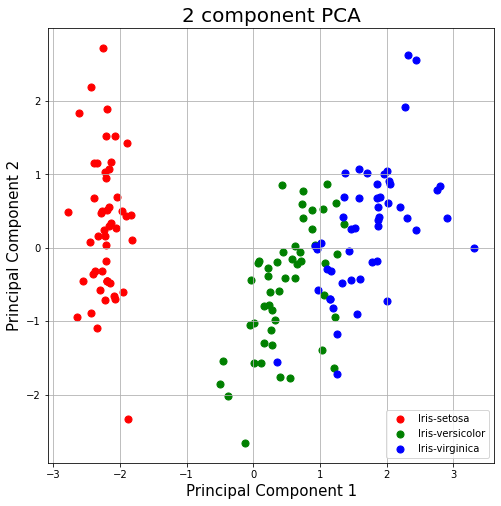

In [21]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

df_principal['target'] = y

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_principal['target'] == target
    ax.scatter(df_principal.loc[indicesToKeep, 'pca1']
               , df_principal.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## 04. Feature Selection 
- 같은 의미라고 볼 수 있는 데이터 제거 
- 아예 관계가 없는 데이터 제거 

<방법>
- 전문가가 알려줌 
- embedded approaches 알고리즘이 알아서 결정 (ex decision tree, lasso, ridge)
- filter approaches 알고리즘과 상관없이 feature만 보고 판단 (ex correlation 강하면 지우기)
- wrapper approaches (feature 바꿔가면서 알고리즘이 좋은 성능을 낼 때까지 바꿔가면서 하기)

https://subinium.github.io/feature-selection/

In [ ]:
# lasso 

# ridge 


## +) feature weighting 

<방법>
 - 도메인 지식 사용 
 - 데이터 마이닝 알고리즘 사용 ex) SVM

### SVM

In [26]:
from sklearn.svm import SVC

classifier = SVC(kernel = "linear", c = 0.01) # 선형 svm 생성, 초평면(hyperplane)은 무조건 feature 수보다 한 차원 낮음 
# 파라미터 c : 이상치 허용 의미 
# c값이 클수록 하드마진, 작을수록 소프트마진 default 1 

training_points = [[1, 2], [1, 5], [2, 2], [7, 5], [9, 4], [8, 2]]
labels = [1, 1, 1, 0, 0, 0]

classifier.fit(training_points, labels) # 학습데이터와 레이블 넣고 모델 생성 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
print(classifier.predict([[3,2]])) # 예측해보기

[1]


In [29]:
classifier.support_vectors_ # 결정경계를 정의하는 서포트 벡터 확인 

array([[7., 5.],
       [8., 2.],
       [2., 2.]])

## 05. Feature Creation 

- mass, volume -> density 

## 06. Discretization and Binarization 

- 이산화,  이진화
- 왜? 알고리즘이 요구하니깐 

### 6- 1) Binarization

In [30]:
# one-hot encoding 
from tensorflow.keras.preprocessing.text import Tokenizer # 토큰화하는 것 
from tensorflow.keras.utils import to_categorical # 카테고리형으로 변화 

text = "나랑 점심 먹자 점심"

t = Tokenizer()
t.fit_on_texts([text]) # 토큰화 
print(t.word_index)

{'점심': 1, '나랑': 2, '먹자': 3}


In [31]:
encoded = t.texts_to_sequences([text])[0]
encoded

[2, 1, 3, 1]

In [33]:
one_hot = to_categorical(encoded)
one_hot

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [34]:
#pd.get_dummies()

fruit = ["사과","바나나","딸기"]

df = pd.DataFrame({'과일' : fruit})
df

,과일
0,사과
1,바나나
2,딸기


In [35]:
pd.get_dummies(df)

,과일_딸기,과일_바나나,과일_사과
0,0,0,1
1,0,1,0
2,1,0,0


In [36]:
pd.get_dummies(df, drop_first= True) # 2가지 열로 3개를 구분할 수 있기 때문에

,과일_바나나,과일_사과
0,0,1
1,1,0
2,0,0


In [37]:
pd.get_dummies(df['과일'])

,딸기,바나나,사과
0,0,0,1
1,0,1,0
2,1,0,0


### 6-2) Discretization 
- 몇 개 카테고리로 할 지 결정 
- 연속 데이터를 n개의 간격으로 나눔 
- 각 카테고리에 연결 

<접근법>
- 고정된 길이 사용 
- 고정된 개수 사용 
- clustering-based discretization ex) k-means 

In [41]:
age = pd.Series([12,13,15,20,40,33,42,27,31,35])

age_category = pd.Series([10,20,30,40]) 
age_category = age_category.astype("category")
age_category

0    10
1    20
2    30
3    40
dtype: category
Categories (4, int64): [10, 20, 30, 40]

In [47]:
for i in range(len(age)) :  # 코드가 굉장히 비효율적이군... 어차피 값 치환하고나서 나중에 category화 해주는 것이 낫겠군 
    if age[i] <20 : 
        age[i] = age_category[0]
    elif age[i] < 30 : 
        age[i] = age_category[1]
    elif age[i] < 40 : 
        age[i] = age_category[2]
    else : 
        age[i] = age_category[3]
age

0    10
1    10
2    10
3    20
4    40
5    30
6    40
7    20
8    30
9    30
dtype: int64

## 07. Variable Transformation 

- simple functions ex) log
- normalization or standardization (정규화 또는 표준화)

In [48]:
df = pd.DataFrame({"age" : [24,67,25],
    "salary": [25000, 25050, 25100]})
df

,age,salary
0,24,25000
1,67,25050
2,25,25100


In [ ]:
df = pd.DataFrame({
    "x" : [10,20,30,10,22,30,44,7,53]
})
df

In [54]:
# 평균 
x_bar = sum(df.x)/len(df.x)
x_bar

25.11111111111111

In [55]:
# 모분산 
df['편차'] = df['x'] - x_bar
df['편차제곱'] = df['편차']**2
var = sum(df['편차제곱'])/len(df)
var

222.54320987654324

In [56]:
# 모표준편차
stdev = var**(1/2)
stdev

14.917882218215267

In [58]:
# 표준화
# numpy 
import numpy as np 
(df['x']-np.mean(df['x']))/np.std(df['x'])

0   -1.012953
1   -0.342616
2    0.327720
3   -1.012953
4   -0.208549
5    0.327720
6    1.266191
7   -1.214054
8    1.869494
Name: x, dtype: float64

In [59]:
# zscore 
import scipy.stats as ss 
data_ss = ss.zscore(df['x'])
data_ss

array([-1.01295284, -0.3426164 ,  0.32772004, -1.01295284, -0.20854911,
        0.32772004,  1.26619105, -1.21405377,  1.86949384])

In [87]:
# sklearn
import sklearn 
from sklearn.preprocessing import *

data = np.random.randint(30, size = (3,1))

ss_data = StandardScaler().fit_transform(data)
ss_data

array([[ 0.56195149],
       [-1.40487872],
       [ 0.84292723]])

In [95]:
# 정규화 (0~1)
# 수식
data = np.random.randint(1,100,size=(4,5))
data_mm = (data - data.min(axis = 0)) / (data.max(axis = 0) - data.min(axis = 0))
print(data_mm)

[[0.59493671 0.17647059 0.         1.         0.93506494]
 [0.35443038 0.         1.         0.         0.51948052]
 [1.         1.         0.61702128 0.84285714 0.        ]
 [0.         0.52941176 0.21276596 0.01428571 1.        ]]


In [97]:
# sklearn.preprocessing 
data_ms=MinMaxScaler().fit_transform(data)
print(data_ms)


[[0.59493671 0.17647059 0.         1.         0.93506494]
 [0.35443038 0.         1.         0.         0.51948052]
 [1.         1.         0.61702128 0.84285714 0.        ]
 [0.         0.52941176 0.21276596 0.01428571 1.        ]]
